In [1]:
import cv2
import math
import matplotlib.pyplot as plt
#%matplotlib inline
import pandas as pd
import numpy as np
from keras.preprocessing import image
import numpy as np
from keras.utils import np_utils
from skimage.transform import resize
from PIL import Image
import re
import os
import random
import shutil
import keras
from keras.models import load_model

In [2]:
###### SOME KEY PARAMETERS FOR SAMPLING RATES #########
AMOUNT_TRAINING = 89
AMOUNT_TEST = 38
RANDOM_SEED = 5
DOUBLE_TRAINING = AMOUNT_TRAINING * 2
DOUBLE_TEST = AMOUNT_TEST * 2

# 1 for 10 samples, 2 for 20 samples, 3 for 30 samples ...
SAMPLING_RATE = 4
SAMPLING_REPRESENTATION = SAMPLING_RATE * 10
VALIDATION_VALUES_PARAMETER = 0.8


###### IMAGE SIZE in pixels ##################
IMAGE_HEIGHT = 63;
IMAGE_WIDTH = 63;

In [3]:
# Loading video names in a column and labels:
os.getcwd()
path = '/home/alehof/Sit_to_stand'

videos = os.listdir(path)

label = []
for i in videos:
    if "incorr" in i:
        label.append(0)
    elif "corr" in i:
        label.append(1)
    else:
        label.append("file_name_incorrect")

videos = pd.DataFrame(videos, label).reset_index()
videos.columns = ["labels", "video_name"]

videos.groupby('labels').count()

,video_name
labels,
0,127
1,127
file_name_incorrect,3


In [4]:
# Splitting the videos into Train and Test Videos:
incorrect=videos.loc[videos["labels"]==0,]
correct=videos.loc[videos["labels"]==1,]

incorrect_range=np.arange(len(incorrect))
correct_range=np.arange(len(correct))
np.random.seed(RANDOM_SEED)
np.random.shuffle(incorrect_range)
np.random.shuffle(correct_range)

correct=correct.iloc[correct_range,]
incorrect=incorrect.iloc[incorrect_range,]

train_correct=correct.iloc[:AMOUNT_TRAINING,]
train_incorrect=incorrect.iloc[:AMOUNT_TRAINING,]
test_correct=correct.iloc[AMOUNT_TRAINING:,]
test_incorrect=incorrect.iloc[AMOUNT_TRAINING:,]

train_set=train_correct.append(train_incorrect)
test_set=test_correct.append(test_incorrect)

train_set=train_set.reset_index().drop("index",axis=1)
test_set=test_set.reset_index().drop("index",axis=1)

print(train_set.groupby('labels').count())
print(test_set.groupby('labels').count())

        video_name
labels            
0               89
1               89
        video_name
labels            
0               38
1               38


In [5]:
exercises_dir_path = path
train_videos_dir = os.path.join(path, "Train_Videos")
test_videos_dir = os.path.join(path, "Test_Videos")
try:
    os.mkdir(exercises_dir_path)
except FileExistsError as ae:
    print("Folder Already Created")

try:
    os.mkdir(train_videos_dir)
except FileExistsError as ae:
    print("Folder Already Created")

try:
    os.mkdir(test_videos_dir)
except FileExistsError as ae:
    print("Folder Already Created")

Folder Already Created
Folder Already Created
Folder Already Created


In [6]:
def video_capturing_function(dataset, folder_name):
    for i in np.arange(len(dataset)):
        video_name = dataset.video_name[i]
        video_read_path = os.path.join(path, video_name)
        cap = cv2.VideoCapture(video_read_path)
        try:
            os.mkdir(os.path.join(os.path.join(path, folder_name),
                                  video_name.split(".")[0]))
        except:
            print("File Already Created")

        train_write_file = os.path.join(os.path.join(path, folder_name),
                                        video_name.split(".")[0])
        cap.set(cv2.CAP_PROP_FPS, 20)
        frameRate = cap.get(5)
        x = 1
        count = 0
        while (cap.isOpened()):
            frameId = cap.get(1)  # current frame number
            ret, frame = cap.read()
            if (ret != True):
                break
            # print(frameRate / 6)
            if (frameId % math.floor(frameRate / SAMPLING_RATE) == 0):
                # if (frameId % math.floor(frameRate) == 0):
                filename = "frame%d.jpg" % count;
                count += 1
                frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                cv2.imwrite(os.path.join(train_write_file, filename), frame_grey)
        cap.release()
    return print("All frames written in the: " + folder_name + " Folder")


video_capturing_function(train_set, "Train_Videos")
video_capturing_function(test_set, "Test_Videos")


File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already 

KeyboardInterrupt: 

In [ ]:
# currently not in use
# Code to see how many frames are captured for each video:
train_dir_path='/home/alehof/Sit_to_stand/Train_Videos'
test_dir_path='/home/alehof/Sit_to_stand/Test_Videos'

vid_file_name=train_set.video_name[0].split('.')[0]

train_frames=[]
for i in np.arange(len(train_set.video_name)):
    vid_file_name=train_set.video_name[i].split('.')[0]
    train_frames.append(len(os.listdir(os.path.join(train_dir_path,vid_file_name))))

test_frames=[]
for i in np.arange(len(test_set.video_name)):
    vid_file_name=test_set.video_name[i].split('.')[0]
    test_frames.append(len(os.listdir(os.path.join(test_dir_path,vid_file_name))))


In [ ]:
def frame_generating_function(dataset, dir_path):
    for i in np.arange(len(dataset.video_name)):
        vid_namu = dataset.video_name[i]
        vid_path = os.path.join(dir_path, vid_namu.split(".")[0])
        # print(vid_path)
        len_frame = len(os.listdir(vid_path))
        # print(len_frame)
        # this is an important value (10 i want to utilize 10 frames, maybe i should set this to a constant)
        j = SAMPLING_REPRESENTATION - len(os.listdir(vid_path))
        # print(j)

        if j > 0:
            list_frames = os.listdir(vid_path)
            print(list_frames)
            c = 0
            for k in np.arange(j):
                list_frames = os.listdir(vid_path)
                print(list_frames)
                # print(list_frames)
                frame = os.path.join(vid_path, list_frames[0])
                # print(frame)
                # get the first frame to be coppied
                # print(frame)
                countu = k + len_frame
                new_frame = "frame%d.jpg" % countu
                shutil.copy2(frame, os.path.join(vid_path, new_frame))
                # c+=1
                # omitting this, I intend to only copy the last frame the amount of times i need it and place it at the end.

        else:
            pass
    return print("Frame Generation Done!")


frame_generating_function(train_set, train_dir_path)
frame_generating_function(test_set, test_dir_path)

In [ ]:
# some troubles detected, folder incorrect respectively correct is created but no files placed, that is why error index out of range occurs,
# can be overcome if another exercise is copied in the respective folder

In [ ]:
# Train and Validation Splitting:
label_1_dat=train_set.loc[train_set["labels"]==1,]
label_0_dat=train_set.loc[train_set["labels"]==0,]

train_len_label1=math.floor(len(label_1_dat)*VALIDATION_VALUES_PARAMETER)
train_len_label0=math.floor(len(label_0_dat)*VALIDATION_VALUES_PARAMETER)

train_dat_label1=label_1_dat.iloc[:train_len_label1,]
train_dat_label0=label_0_dat.iloc[:train_len_label0,]

validation_dat_label1=label_1_dat.iloc[train_len_label1:,]
validation_dat_label0=label_0_dat.iloc[train_len_label0:,]

train_vid_dat=train_dat_label1.append(train_dat_label0,ignore_index=True)
validation_vid_dat=validation_dat_label1.append(validation_dat_label0,ignore_index=True)

In [ ]:
# Data load function for 10 frames:

def data_load_function_SAMPLING_REPRESENTATION_frames(dataset,directory):
    frames=[]
    for i in np.arange(len(dataset)):
        vid_name=dataset.video_name[i].split(".")[0]
        vid_dir_path=os.path.join(directory,vid_name)
        frames_to_select=[]
        for l in np.arange(0,SAMPLING_REPRESENTATION):
            frames_to_select.append('frame%d.jpg' % l)
        vid_data=[]
        for frame in frames_to_select:
            image=Image.open(os.path.join(vid_dir_path,frame))
            image=image.resize((IMAGE_HEIGHT, IMAGE_WIDTH), Image.ANTIALIAS)
            datu=np.asarray(image)
            normu_dat=datu/255
            vid_data.append(normu_dat)
        vid_data=np.array(vid_data)
        frames.append(vid_data)
    return np.array(frames)


In [ ]:
# frames train,validation and test data:

test_dataset_new=data_load_function_SAMPLING_REPRESENTATION_frames(test_set, test_dir_path)
train_dataset_new=data_load_function_SAMPLING_REPRESENTATION_frames(train_vid_dat, train_dir_path)
validation_dataset_new= data_load_function_SAMPLING_REPRESENTATION_frames(validation_vid_dat, train_dir_path)

test_labels=np.array(test_set.labels)
train_labels=np.array(train_vid_dat.labels)
validation_labels=np.array(validation_vid_dat.labels)

In [ ]:
INTEGER_RESULT =  math.floor(DOUBLE_TRAINING*VALIDATION_VALUES_PARAMETER)
INTEGER_RESULT_2 = math.ceil((DOUBLE_TRAINING*(1 - VALIDATION_VALUES_PARAMETER)))
# Reshaping tensors to confirm with the model we are going to train:
test_dataset_new=test_dataset_new.reshape((DOUBLE_TEST,SAMPLING_REPRESENTATION,IMAGE_HEIGHT,IMAGE_WIDTH,1))
train_dataset_new=train_dataset_new.reshape((INTEGER_RESULT,SAMPLING_REPRESENTATION,IMAGE_HEIGHT,IMAGE_WIDTH,1))
validation_dataset_new=validation_dataset_new.reshape((INTEGER_RESULT_2,SAMPLING_REPRESENTATION,IMAGE_HEIGHT,IMAGE_WIDTH,1))
print(train_dataset_new)
print(train_labels)

In [ ]:
## important to consider exercise numbers, as above 80 % of training will stay training data
## 20 % will become validation data 
## therefore considering the 140 videos i had
## i had 98 in training data folder. and 42 in test data folder
## 98 * 0,2 = 20 rounded, + 98*0,8 = 78 rounded (math floor), now it matches up.

## new try with 80% - 20 %

# 110 and 28

In [ ]:
baseline_predictions=np.ones(len(test_labels))
test_accuracy_naive=np.where(baseline_predictions==test_labels)[0].shape[0]/len(test_labels)
test_accuracy_naive

In [ ]:
#now standard simple CNN and LSTM basic architecture


In [ ]:
import gc
from tensorflow.keras import backend as k
from tensorflow.keras.callbacks import Callback

In [ ]:
class ClearMemory(Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()
        k.clear_session()

In [ ]:
##### REASSIGNING TYPE CONVERSION NEEDED FOR ALL MODELS
train_dataset_new=np.asarray(train_dataset_new).astype(np.float32)
train_labels=np.asarray(train_labels).astype(np.float32)
validation_dataset_new=np.asarray(validation_dataset_new).astype(np.float32)
validation_labels=np.asarray(validation_labels).astype(np.float32)
test_dataset_new=np.asarray(test_dataset_new).astype(np.float32)
test_labels=np.asarray(test_labels).astype(np.float32)
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")

In [ ]:

import tensorflow as tf
tf.config.list_physical_devices('GPU')


In [ ]:
##### 3D CNN Architecture:


In [ ]:
from keras.layers import Conv3D, MaxPooling3D, BatchNormalization, Dropout, Dense, Flatten, concatenate
from keras.models import Model
from keras import Input
# 3D Convolutional Model:
input_model=Input(shape=(SAMPLING_REPRESENTATION, IMAGE_HEIGHT, IMAGE_WIDTH, 1))
layer=Conv3D(32,(3,3,3),strides=(1,1,1),activation='relu')(input_model)
layer=MaxPooling3D((2,2,2))(layer)
layer=Conv3D(64,(3,3,3),strides=(1,1,1),activation='relu')(layer)
layer=MaxPooling3D((2,2,2))(layer)
layer=BatchNormalization()(layer)
layer=Flatten()(layer)
layer=Dense(128,activation='relu')(layer)
layer=Dropout(0.1)(layer)
layer=Dense(64,activation='relu')(layer)
layer=Dense(32,activation='relu')(layer)
layer_output=Dense(1,activation='sigmoid')(layer)

model_3dConv=Model(input_model,layer_output)

model_3dConv.summary()

In [ ]:
##### MODEL _ KEYPARAMETERS

FACTOR = 0.1
PATIENCE = 4
BATCH_SIZE = 4
EPOCHS = 14

##### USING TIME TO STORE MODEL NAME
import time
timestr = time.strftime("%Y%m%d-%H%M%S")



FILEPATH = 'cnn_lstm_model_3_' + timestr + '.h5'
print(FILEPATH)

In [ ]:
# Conv3d model training:
from keras import optimizers
optimizer_new=optimizers.RMSprop(lr=0.1)
optimizer_adagrad=keras.optimizers.Adagrad(lr=0.01)
callbacks_list_conv_3d=[keras.callbacks.EarlyStopping(
monitor='acc',patience=4),
               keras.callbacks.ModelCheckpoint(
               filepath=FILEPATH,
               monitor='val_loss',
               save_best_only=True),
                        keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = FACTOR, patience = PATIENCE)
               ]
model_3dConv.compile(optimizer=optimizer_adagrad,loss='binary_crossentropy',metrics=['acc'])
conv_3d_model_history=model_3dConv.fit(train_dataset_new,train_labels,batch_size=BATCH_SIZE,epochs=EPOCHS,
               validation_data=(validation_dataset_new,validation_labels),
               callbacks=callbacks_list_conv_3d)

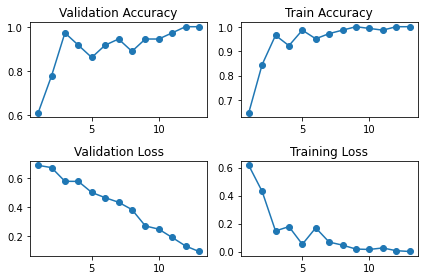

In [61]:
acc=conv_3d_model_history.history["acc"]
val_acc=conv_3d_model_history.history["val_acc"]
loss=conv_3d_model_history.history["loss"]
val_loss=conv_3d_model_history.history["val_loss"]


epochs=np.arange(1,14)

plt.figure()
plt.subplot(2,2,1)
plt.plot(epochs,val_acc,'-o')
plt.title('Validation Accuracy')

plt.subplot(2,2,2)
plt.plot(epochs,acc,'-o')
plt.title('Train Accuracy')

plt.subplot(2,2,3)
plt.plot(epochs,val_loss,'-o')
plt.title('Validation Loss')

plt.subplot(2,2,4)
plt.plot(epochs,loss,'-o')
plt.title('Training Loss')


plt.tight_layout()

In [62]:
#modelu_6=load_model('stretch_model_conv_3d_new4.h5')
modelu_6=load_model(FILEPATH)
modelu_6.evaluate(test_dataset_new,test_labels)

3/3 [==============================] - 2s 512ms/step - loss: 0.0652 - acc: 0.9868


[0.0651533454656601, 0.9868420958518982]

In [ ]:
#Loading the two best models:

In [42]:
modelu_cnlst_1=load_model('cnn_lstm_model_3_20210620-090949.h5')
### FOR TIMES SAKE 2 times the same
modelu_cnlst_2=load_model('cnn_lstm_model_3_20210620-090949.h5')

# since they were already loaded -> the model names need to be manually asigned here 
#modelu_cnlst_1=load_model('cnn_lstm_model_new3.h5')
#modelu_cnlst_2=load_model('cnn_lstm_model_new4.h5')

In [43]:
#Video Folder Create Function:¶
video_list=os.listdir(os.path.join(path,'test_rl_1'))

print(video_list)

['vid_3.mp4', 'vid_5.mp4', 'test_rl_1.mp4', 'vid_2.mp4', 'vid_1.mp4', 'vid_7.mp4', 'vid_8.mp4', 'vid_0.mp4', 'vid_9.mp4', 'vid_4.mp4', 'test_rl_1', 'vid_6.mp4']


In [44]:
print(path)

/home/alehof/Sit_to_stand


In [45]:
!pip install moviepy

In [46]:
from moviepy.video.io.VideoFileClip import VideoFileClip
def video_folder_create(path,video_folder_name,video_name):
    video_folder_path=os.path.join(path,video_folder_name)
    try:
        os.mkdir(os.path.join(video_folder_path,video_folder_name))
    except:
        print("Folder already created")
    input_video_path=os.path.join(path,video_name)
    times=[[0,5],[6,10],[11,15],[16,20],[21,25],[26,30],[31,35],[36,40],[41,45],[46,50]]
    for i in np.arange(len(times)):
        vid_name="vid_%d.mp4" % i
        output_video_path=os.path.join(video_folder_path,vid_name)
        with VideoFileClip(input_video_path) as video:
            new = video.subclip(times[i][0], times[i][1])
            new.write_videofile(output_video_path,audio_codec='aac')
    return True

# Creating 5 folders for 5 test videos:
video_folder_create(path,'test_rl_1','test_rl_1.mp4')


Folder already created
Moviepy - Building video /home/alehof/Sit_to_stand/test_rl_1/vid_0.mp4.
MoviePy - Writing audio in vid_0TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /home/alehof/Sit_to_stand/test_rl_1/vid_0.mp4



Moviepy - Done !
Moviepy - video ready /home/alehof/Sit_to_stand/test_rl_1/vid_0.mp4
Moviepy - Building video /home/alehof/Sit_to_stand/test_rl_1/vid_1.mp4.
MoviePy - Writing audio in vid_1TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /home/alehof/Sit_to_stand/test_rl_1/vid_1.mp4



Moviepy - Done !
Moviepy - video ready /home/alehof/Sit_to_stand/test_rl_1/vid_1.mp4
Moviepy - Building video /home/alehof/Sit_to_stand/test_rl_1/vid_2.mp4.
MoviePy - Writing audio in vid_2TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /home/alehof/Sit_to_stand/test_rl_1/vid_2.mp4



Moviepy - Done !
Moviepy - video ready /home/alehof/Sit_to_stand/test_rl_1/vid_2.mp4
Moviepy - Building video /home/alehof/Sit_to_stand/test_rl_1/vid_3.mp4.
MoviePy - Writing audio in vid_3TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /home/alehof/Sit_to_stand/test_rl_1/vid_3.mp4



Moviepy - Done !
Moviepy - video ready /home/alehof/Sit_to_stand/test_rl_1/vid_3.mp4
Moviepy - Building video /home/alehof/Sit_to_stand/test_rl_1/vid_4.mp4.
MoviePy - Writing audio in vid_4TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /home/alehof/Sit_to_stand/test_rl_1/vid_4.mp4



Moviepy - Done !
Moviepy - video ready /home/alehof/Sit_to_stand/test_rl_1/vid_4.mp4
Moviepy - Building video /home/alehof/Sit_to_stand/test_rl_1/vid_5.mp4.
MoviePy - Writing audio in vid_5TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /home/alehof/Sit_to_stand/test_rl_1/vid_5.mp4



Moviepy - Done !
Moviepy - video ready /home/alehof/Sit_to_stand/test_rl_1/vid_5.mp4
Moviepy - Building video /home/alehof/Sit_to_stand/test_rl_1/vid_6.mp4.
MoviePy - Writing audio in vid_6TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /home/alehof/Sit_to_stand/test_rl_1/vid_6.mp4



Moviepy - Done !
Moviepy - video ready /home/alehof/Sit_to_stand/test_rl_1/vid_6.mp4
Moviepy - Building video /home/alehof/Sit_to_stand/test_rl_1/vid_7.mp4.
MoviePy - Writing audio in vid_7TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /home/alehof/Sit_to_stand/test_rl_1/vid_7.mp4



Moviepy - Done !
Moviepy - video ready /home/alehof/Sit_to_stand/test_rl_1/vid_7.mp4
Moviepy - Building video /home/alehof/Sit_to_stand/test_rl_1/vid_8.mp4.
MoviePy - Writing audio in vid_8TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /home/alehof/Sit_to_stand/test_rl_1/vid_8.mp4



Moviepy - Done !
Moviepy - video ready /home/alehof/Sit_to_stand/test_rl_1/vid_8.mp4
Moviepy - Building video /home/alehof/Sit_to_stand/test_rl_1/vid_9.mp4.
MoviePy - Writing audio in vid_9TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /home/alehof/Sit_to_stand/test_rl_1/vid_9.mp4



Moviepy - Done !
Moviepy - video ready /home/alehof/Sit_to_stand/test_rl_1/vid_9.mp4


True

In [69]:
def real_time_prediction(path,video_folder_name):
    folder_path=os.path.join(path,video_folder_name)
    video_list=os.listdir(folder_path)
    prediction_list_1=[]
    prediction_list_2=[]
    for i in np.arange(len(video_list)):
        video_path=os.path.join(folder_path,video_list[i])
        cap=cv2.VideoCapture(video_path)
        cap.set(cv2.CAP_PROP_FPS, 1)
        frameRate=cap.get(5)
        x=1
        count=0
        frame_saved=[]
        while(cap.isOpened()):
            frameId = cap.get(1) #current frame number
            ret, frame = cap.read()
            if (ret != True):
                break
            if (frameId % math.floor(frameRate) == 0):
                frame_grey=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                frame_grey=cv2.resize(frame_grey,(63,63))
                frame_grey=frame_grey/255
                frame_saved.append(frame_grey)
        cap.release()
        frame_diff=10-len(frame_saved)
        if frame_diff>0:
            for k in np.arange(frame_diff):
                frame_saved.append(frame_saved[k])
        else:
            pass
        frame_saved=frame_saved[:10]
        frame_saved=np.array(frame_saved)
        dats=frame_saved.reshape((1,10,63,63,1))
        prediction_list_1.append(modelu_cnlst_1.predict(dats))
    return prediction_list_1

In [71]:
prediction_model_1=real_time_prediction(path,"test_rl_1")

predu_1=[]
for i in prediction_model_1:
    predu_1.append(list(i[0])[0])
#predu_2=[]
#for i in prediction_model_2:
#    predu_2.append(list(i[0])[0])
times=[[0,5],[6,10],[11,15],[16,20],[21,25],[26,30],[31,35],[36,40],[41,45],[46,50]]
time_axis=[]
for i in times:
    time_axis.append(str(i[0])+"_"+str(i[1]))
    
# main_preds=np.average(np.array([predu_1,predu_2]),axis=0)
main_preds=np.array(predu_1)
print(main_preds)

    
plt.figure()
plt.plot(time_axis,main_preds,"-o")
plt.xlabel("Time slots of video in Seconds")
plt.xticks(rotation=60)
plt.ylabel("Predictions")
plt.title("Model_Predictions")
plt.show()

ValueError: in user code:

    /home/alehof/BA2_action_recogntion/BA2/lib/python3.8/site-packages/keras/engine/training.py:1544 predict_function  *
        return step_function(self, iterator)
    /home/alehof/BA2_action_recogntion/BA2/lib/python3.8/site-packages/keras/engine/training.py:1527 run_step  *
        outputs = model.predict_step(data)
    /home/alehof/BA2_action_recogntion/BA2/lib/python3.8/site-packages/keras/engine/training.py:1500 predict_step  *
        return self(x, training=False)
    /home/alehof/BA2_action_recogntion/BA2/lib/python3.8/site-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/alehof/BA2_action_recogntion/BA2/lib/python3.8/site-packages/keras/engine/input_spec.py:264 assert_input_compatibility  *
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model_1: expected shape=(None, 20, 63, 63, 1), found shape=(None, 10, None, None, 1)
